In [1]:
import geopandas
import pandas
import pathlib
import shapely
import numpy
from IPython.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
crs=2193

In [12]:
output_path = pathlib.Path(r"C:\Local\data\catchments\measured_sections")

# Westport 
### Select sections & convert to lines
Includes sections Section7, Section8, Section9, Section10

In [3]:
base_path = pathlib.Path(r"C:\Local\data\river_bathemetry\sections\Westport")

In [4]:
sections_to_keep = ['Section1', 'Section2', 'Section2A', 'Section2B', 'Section3', 'Section3A', 'Section4', 'Section5', 'Section6',
                    'Section7', 'Section8', 'Section9', 'Section10', 'Section11', 'Section12', 'Section13', 'Section14',
                    'Section15', 'Section16', 'Section21', 'Section22', 'Section23', 'Section24', 'Section25', 'Section26']

In [7]:
sections = geopandas.read_file(base_path / "3738_Buller_River_October_2021" / "3738_Buller_River_October_2021_NZVD2016.geojson")
print(f"CRS's should match. {crs == sections.crs}")
sections = sections.query('Name in @sections_to_keep')
sections = sections.groupby(['Name'])['geometry'].apply(lambda x: shapely.geometry.LineString(x.tolist())).set_crs(crs)
sections = sections.reindex(index = sections_to_keep)

CRS's should match. True


In [11]:
#sections.plot()

In [13]:
sections.to_file(output_path / "westport" / "measured_sections.geojson")

# Waiakane
### Convert sections to lines

In [14]:
base_path = pathlib.Path(r"C:\Local\data\river_bathemetry\sections\Waikanae")

In [19]:
sections = geopandas.read_file(base_path / "Waikanae_Cross_Sections_NIWA" / "2014_Survey_XS_NZVD2016.geojson")
sections = sections.groupby(['Section'])['geometry'].apply(lambda x: shapely.geometry.LineString(x.tolist())).set_crs(crs)

<Axes: >

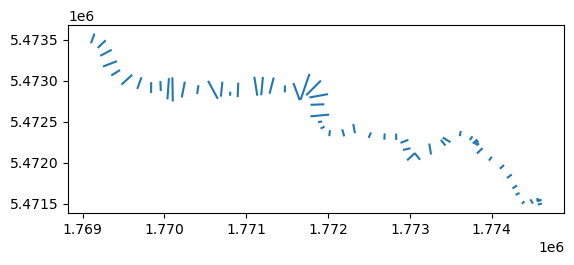

In [21]:
#sections.plot()

In [22]:
sections.to_file(output_path / "waikanae" / "measured_sections.geojson")